In [1]:
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import random
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import sklearn
from sklearn.preprocessing import StandardScaler

import datetime

In [2]:
dark_star_input_file = "wav/DarkStarSingleVersion.wav"
#"wav/dark_star.wav"
y, sr = librosa.load(dark_star_input_file)

In [4]:
hop_length = 512
onset_frames = librosa.onset.onset_detect(y, sr=sr, hop_length=hop_length)
print(onset_frames) # frame numbers of estimated onsets

[   3    9   22   61   67   75   79  117  122  136  150  158  163  170
  175  183  204  218  227  232  240  246  259  266  280  286  293  312
  328  341  348  364  376  389  402  417  423  431  444  458  471  477
  485  504  519  533  561  568  587  594  608  614  626  628  642  657
  670  677  697  704  714  719  735  751  765  773  779  786  792  802
  807  813  826  832  840  846  860  874  888  897  909  916  923  937
  950  956  970  980  985  992 1005 1012 1026 1033 1040 1053 1060 1065
 1067 1097 1139 1161 1180 1230 1253 1325 1343 1351 1372 1394 1407 1421
 1447 1467 1475 1480 1487 1499 1515 1520 1522 1570 1577 1584 1589 1598
 1607 1617 1630 1634 1645 1651 1673 1687 1693 1699 1707 1719 1721 1726
 1737 1741 1754 1776 1783 1789 1796 1803 1812 1820 1832 1891 1904 1925
 1939 1944 1954 2016 2036 2056 2086 2105 2107 2123 2143 2162 2175 2179
 2193 2219 2235 2246 2251 2262 2272 2291 2303 2311 2317 2319 2324 2331
 2341 2353 2366 2372 2379 2386 2393 2400 2445 2456 2463 2478 2498 2513
 2534 

/var/folders/12/lnw3jf817_x0g5w5q1l9d8x00000gn/T/ipykernel_21722/926472001.py:2: FutureWarning: Pass y=[ 4.6106466e-06 -6.2300746e-06  1.2836868e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  onset_frames = librosa.onset.onset_detect(y, sr=sr, hop_length=hop_length)


In [5]:
onset_times = librosa.frames_to_time(onset_frames, sr=sr, hop_length=hop_length)
print(onset_times)

[6.96598639e-02 2.08979592e-01 5.10839002e-01 1.41641723e+00
 1.55573696e+00 1.74149660e+00 1.83437642e+00 2.71673469e+00
 2.83283447e+00 3.15791383e+00 3.48299320e+00 3.66875283e+00
 3.78485261e+00 3.94739229e+00 4.06349206e+00 4.24925170e+00
 4.73687075e+00 5.06195011e+00 5.27092971e+00 5.38702948e+00
 5.57278912e+00 5.71210884e+00 6.01396825e+00 6.17650794e+00
 6.50158730e+00 6.64090703e+00 6.80344671e+00 7.24462585e+00
 7.61614512e+00 7.91800454e+00 8.08054422e+00 8.45206349e+00
 8.73070295e+00 9.03256236e+00 9.33442177e+00 9.68272109e+00
 9.82204082e+00 1.00078005e+01 1.03096599e+01 1.06347392e+01
 1.09365986e+01 1.10759184e+01 1.12616780e+01 1.17028571e+01
 1.20511565e+01 1.23762358e+01 1.30263946e+01 1.31889342e+01
 1.36301134e+01 1.37926531e+01 1.41177324e+01 1.42570522e+01
 1.45356916e+01 1.45821315e+01 1.49072109e+01 1.52555102e+01
 1.55573696e+01 1.57199093e+01 1.61843084e+01 1.63468481e+01
 1.65790476e+01 1.66951474e+01 1.70666667e+01 1.74381859e+01
 1.77632653e+01 1.794902

In [6]:
onset_samples = librosa.frames_to_samples(onset_frames, hop_length=hop_length)
print(onset_samples)

[   1536    4608   11264   31232   34304   38400   40448   59904   62464
   69632   76800   80896   83456   87040   89600   93696  104448  111616
  116224  118784  122880  125952  132608  136192  143360  146432  150016
  159744  167936  174592  178176  186368  192512  199168  205824  213504
  216576  220672  227328  234496  241152  244224  248320  258048  265728
  272896  287232  290816  300544  304128  311296  314368  320512  321536
  328704  336384  343040  346624  356864  360448  365568  368128  376320
  384512  391680  395776  398848  402432  405504  410624  413184  416256
  422912  425984  430080  433152  440320  447488  454656  459264  465408
  468992  472576  479744  486400  489472  496640  501760  504320  507904
  514560  518144  525312  528896  532480  539136  542720  545280  546304
  561664  583168  594432  604160  629760  641536  678400  687616  691712
  702464  713728  720384  727552  740864  751104  755200  757760  761344
  767488  775680  778240  779264  803840  807424  8

/Users/charleskramer/opt/anaconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  return f(*args, **kwargs)


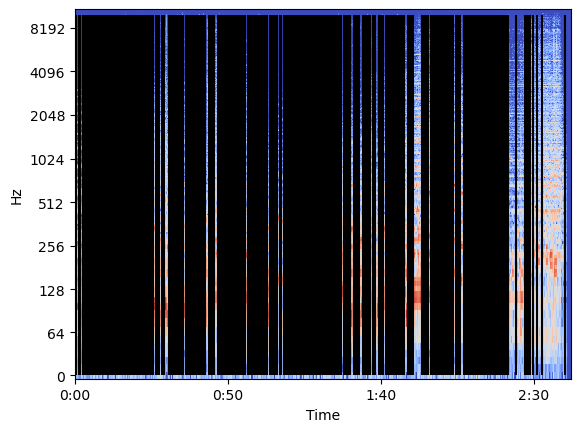

In [7]:
S = librosa.stft(y)
logS = librosa.amplitude_to_db(S)
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='log')
plt.vlines(onset_times, 0, 10000, color='k')

In [ ]:
mfccs_T = librosa.feature.mfcc(y=y,sr=sr)

In [ ]:
mfccs_unscaled = mfccs_T.transpose()
scaler = StandardScaler()
mfccs = scaler.fit_transform(mfccs_unscaled)
mfccs.shape

In [ ]:

S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                   fmax=8000)
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(librosa.power_to_db(S, ref=np.max),
                               x_axis='time', y_axis='mel', fmax=8000,
                               ax=ax[0])
fig.colorbar(img, ax=[ax[0]])
ax[0].set(title='Mel spectrogram')
ax[0].label_outer()
img = librosa.display.specshow(mfccs_T, x_axis='time', ax=ax[1])
fig.colorbar(img, ax=[ax[1]])
ax[1].set(title='MFCC')

In [ ]:

ipd.Audio(dark_star_input_file)

In [ ]:
kmeans = sklearn.cluster.KMeans(n_clusters=5,max_iter=500)
kmeans.fit(mfccs)
clusters=kmeans.predict(mfccs)

In [ ]:
xdata_seconds = librosa.times_like(mfccs_T)
x = [datetime.timedelta(seconds=xi) for xi in xdata_seconds]
x_time = [str(xi) for xi in x]
# fig1, ax1 = plt.subplots()
# ax1.plot(x_time,clusters)
#doesnt work with scatterplot?

x_time = [datetime.datetime(year=9999,month=1,day=1,hour=0)+ datetime.timedelta(seconds=i) for i in xdata_seconds]

y = clusters
fig2, ax2 = plt.subplots()
date_form = DateFormatter("%M:%S")
ax2.xaxis.set_major_formatter(date_form)
ax2.scatter(x_time,y,c=y)